In [1]:
import networkx as nx
G = nx.read_edgelist("3.graph.txt", nodetype=int, create_using=nx.MultiDiGraph())

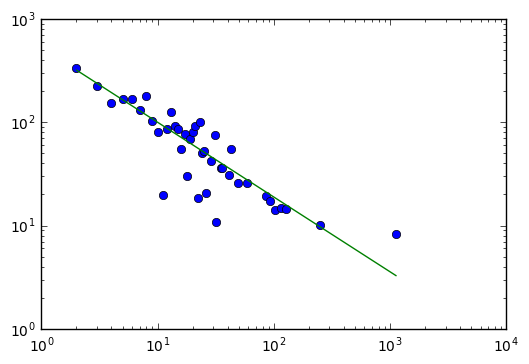

(-0.72363195619655984, array([[  2.13524268e-03,  -1.86350647e+00],
       [ -1.86350647e+00,   2.07867032e+03]]))
(-0.72363195619655984, 527.59168888861018)


In [13]:
from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def get_x(graph):
    result = defaultdict(int)
    for u, v in graph.edges():
        result[(graph.degree(u), graph.degree(v))] += 1
        result[(graph.degree(v), graph.degree(u))] += 1
        
    return result


degrees = set(G.degree().values())
X = get_x(G)
degs = []
assorts = []

for d in sorted(degrees):
    dnn = float(sum(d1 * X[(d1, d)] for d1 in degrees)) / sum(X[(d1, d)] for d1 in degrees)
    degs.append(d)
    assorts.append(dnn)
    
degs = np.array(degs, dtype=np.float32)
assorts = np.array(assorts, dtype=np.float32)

def opt_function(dgs, sgm, beta):
    return beta * dgs ** sgm 


popt, pcov = curve_fit(opt_function, degs, assorts)

sigma, beta = popt

plt.loglog(degs, assorts, ls='None', marker='o')
plt.loglog(degs, opt_function(degs, sigma, beta))

plt.show()
print(sigma, pcov)
print(sigma, beta)

In [14]:
print(sigma)
((degs ** sigma - assorts) ** 2).sum(), ((degs ** -0.75 - assorts) ** 2).sum()

-0.723631956197


(407875.22, 407937.06)

In [ ]:
def l2(a1, a2):
    return ((a1 - a2) ** 2).sum()

In [ ]:
l2(assorts, degs ** sigma), l2(assorts, degs ** -sigma)

In [8]:
((assorts - assorts) ** 2).sum()

0.0

In [ ]:
degs ** -sigma

In [ ]:
assorts

In [ ]:
l2(assorts, degs ** (sigma + 0.01))